In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings


In [2]:
df = pd.read_sas("bankloan.sas7bdat")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       850 non-null    float64
 1   ed        850 non-null    float64
 2   employ    850 non-null    float64
 3   address   850 non-null    float64
 4   income    850 non-null    float64
 5   debtinc   850 non-null    float64
 6   creddebt  850 non-null    float64
 7   othdebt   850 non-null    float64
 8   default   700 non-null    float64
dtypes: float64(9)
memory usage: 59.9 KB


In [4]:
df.isnull().sum()

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     150
dtype: int64

In [5]:
pd.DataFrame(df)

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41.0,3.0,17.0,12.0,176.0,9.3,11.359392,5.008608,1.0
1,27.0,1.0,10.0,6.0,31.0,17.3,1.362202,4.000798,0.0
2,40.0,1.0,15.0,14.0,55.0,5.5,0.856075,2.168925,0.0
3,41.0,1.0,15.0,14.0,120.0,2.9,2.658720,0.821280,0.0
4,24.0,2.0,2.0,0.0,28.0,17.3,1.787436,3.056564,1.0
...,...,...,...,...,...,...,...,...,...
845,34.0,1.0,12.0,15.0,32.0,2.7,0.239328,0.624672,NaN
846,32.0,2.0,12.0,11.0,116.0,5.7,4.026708,2.585292,NaN
847,48.0,1.0,13.0,11.0,38.0,10.8,0.722304,3.381696,NaN
848,35.0,2.0,1.0,11.0,24.0,7.8,0.417456,1.454544,NaN


In [6]:
#makig null value as sample
sample =df[df["default"].isnull()]

In [7]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 700 to 849
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       150 non-null    float64
 1   ed        150 non-null    float64
 2   employ    150 non-null    float64
 3   address   150 non-null    float64
 4   income    150 non-null    float64
 5   debtinc   150 non-null    float64
 6   creddebt  150 non-null    float64
 7   othdebt   150 non-null    float64
 8   default   0 non-null      float64
dtypes: float64(9)
memory usage: 11.7 KB


In [8]:
#no null data
df1=df[~df["default"].isnull()]

In [9]:
df1.isnull().sum()

age         0
ed          0
employ      0
address     0
income      0
debtinc     0
creddebt    0
othdebt     0
default     0
dtype: int64

In [10]:
df1.duplicated().sum()

np.int64(0)

In [11]:
def IQR(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3-q1
    LF = q3-(1.5*iqr)
    UF = q3+(1.5*iqr)
    print("LF-->",LF)
    print("UF-->",UF)

In [12]:
def outliers(x):
    y = x.select_dtypes(include=[int,float])
    for i in y:
        sns.boxplot(x=df[i])
        plt.title(i)
        plt.show()

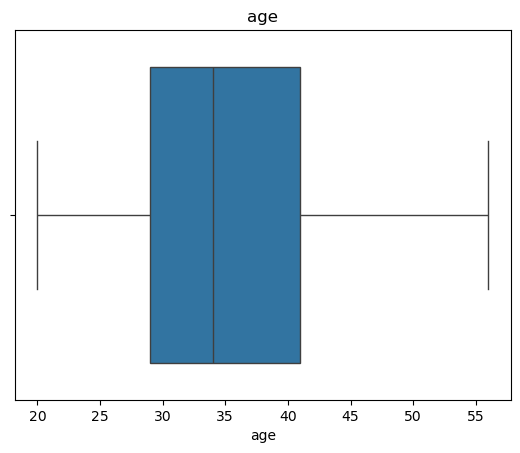

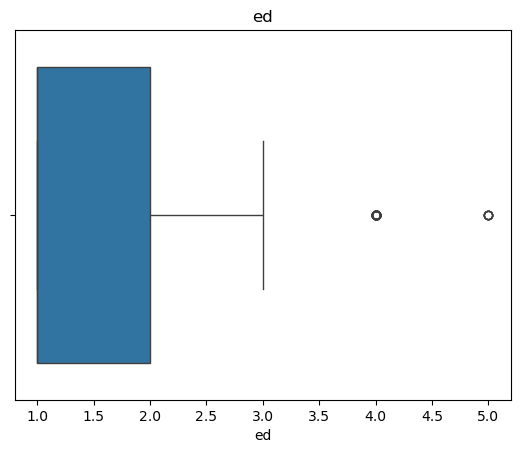

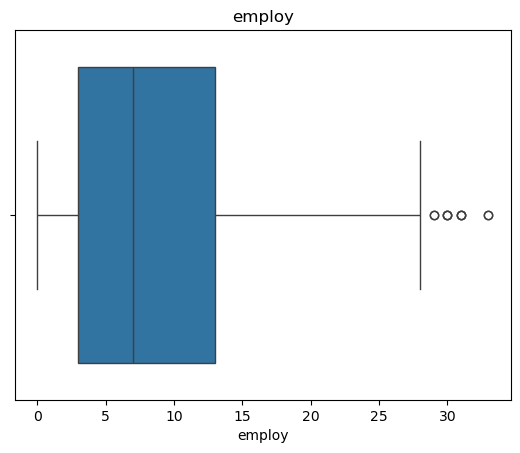

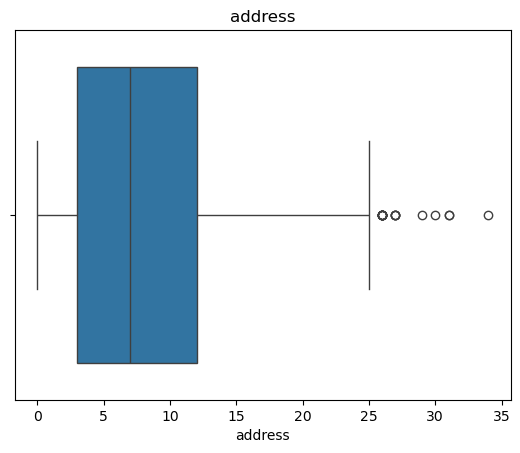

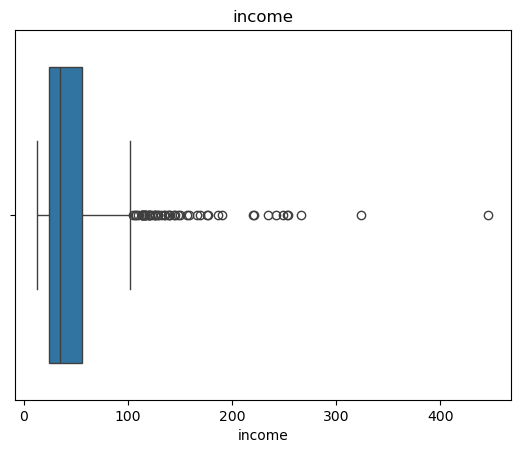

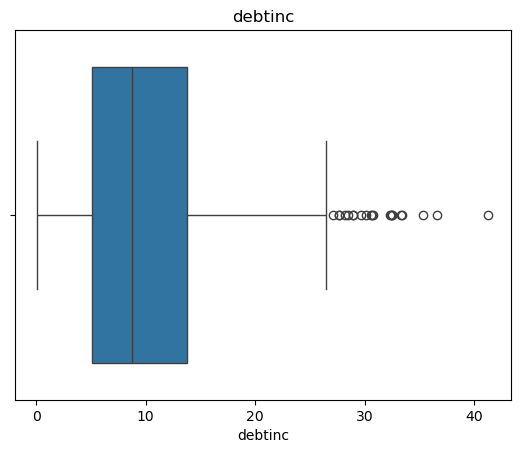

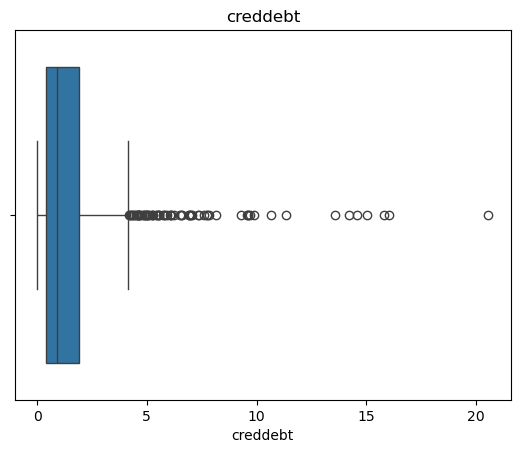

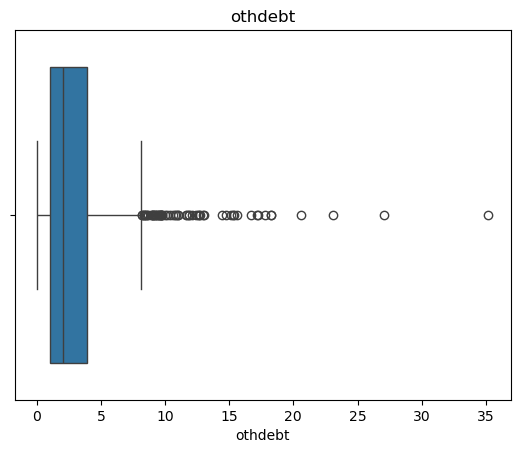

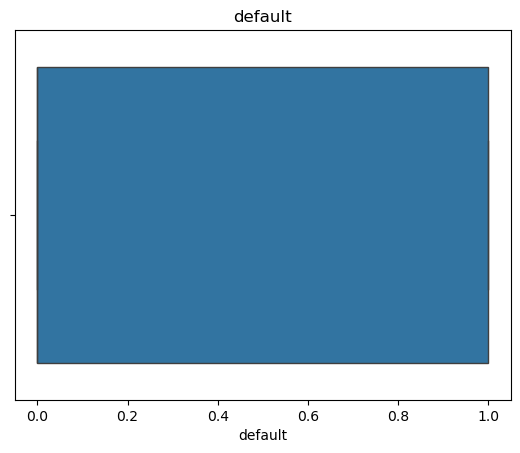

In [13]:
outliers(df1)

In [14]:
IQR(df1["ed"])

LF--> 0.5
UF--> 3.5


In [15]:
df1["ed"] = np.where(df1["ed"]>3.5,3.5,df1["ed"])

In [16]:
IQR(df1["employ"])

LF--> -1.5
UF--> 25.5


In [17]:
df1["employ"] = np.where(df1["employ"]>25.5,25.5,df1["employ"])

In [18]:
IQR(df1["address"])

LF--> -1.5
UF--> 25.5


In [19]:
df1["address"] = np.where(df1["address"]>25.5,25.5,df1["address"])

In [20]:
IQR(df1["income"])

LF--> 8.5
UF--> 101.5


In [21]:
df1["income"] = np.where(df1["income"]>101.5,101.5,df1["income"])

In [22]:
IQR(df1["debtinc"])

LF--> 0.4375000000000018
UF--> 27.812499999999993


In [23]:
df1["debtinc"] = np.where(df1["debtinc"]>27.812,27.812,df1["debtinc"])

In [24]:
IQR(df1["creddebt"])

LF--> -0.39738862499999983
UF--> 4.201298625


In [25]:
df1["creddebt"] = np.where(df1["creddebt"]>4.201,4.201,df1["creddebt"])

In [26]:
IQR(df1["othdebt"])

LF--> -0.3952650000000002
UF--> 8.2413945


In [27]:
df1["othdebt"] = np.where(df1["othdebt"]>8.24,8.24,df1["creddebt"])

In [28]:
def outliers(x):
    y = x.select_dtypes(include=[int,float])
    for i in y:
        sns.boxplot(x=df[i])
        plt.title(i)
        plt.show()

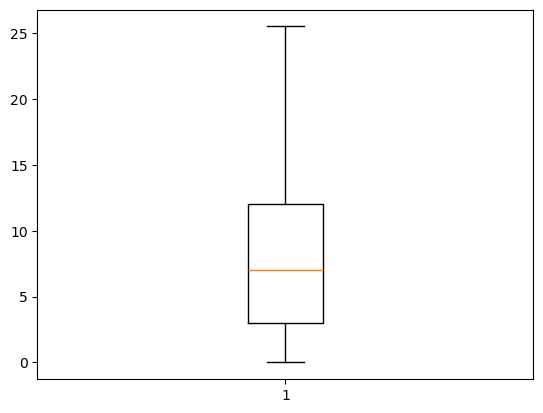

In [29]:
plt.boxplot(df1["address"])
plt.show()


In [30]:
df1.columns

Index(['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt', 'default'],
      dtype='object')

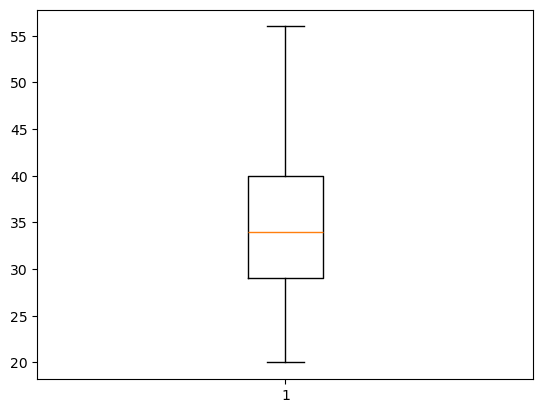

In [31]:
plt.boxplot(df1["age"])
plt.show()

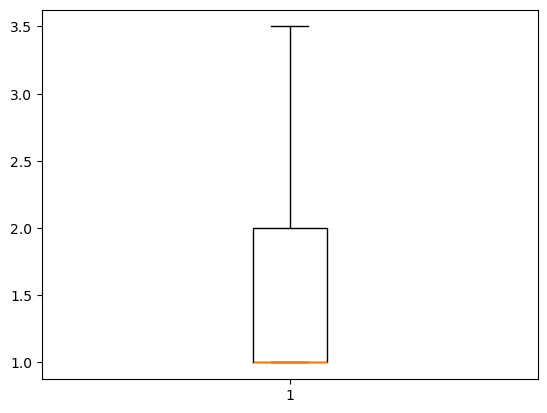

In [32]:
plt.boxplot(df1["ed"])
plt.show()

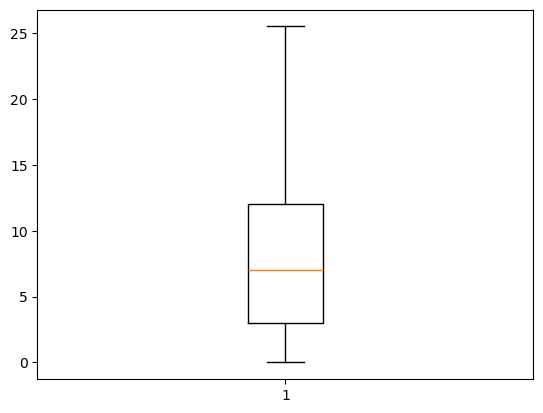

In [33]:
plt.boxplot(df1['employ'])
plt.show()

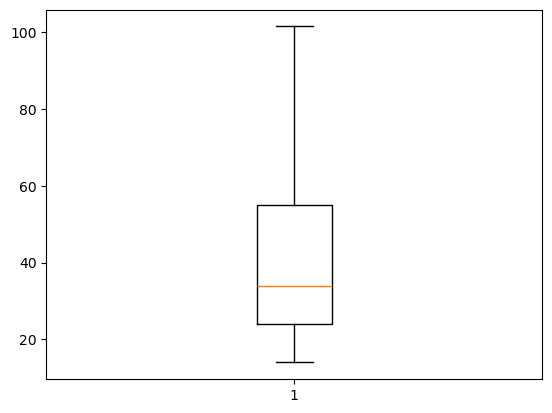

In [34]:
plt.boxplot(df1["income"])
plt.show()

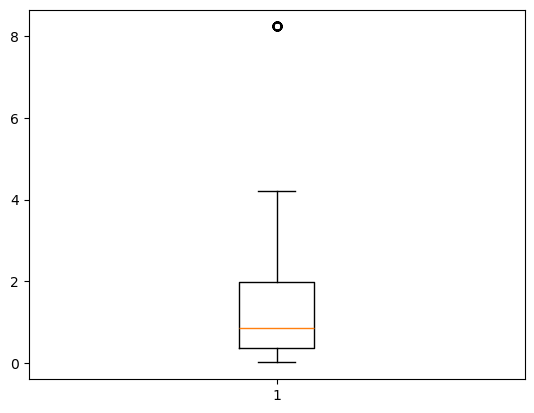

In [35]:
plt.boxplot(df1["othdebt"])
plt.show()

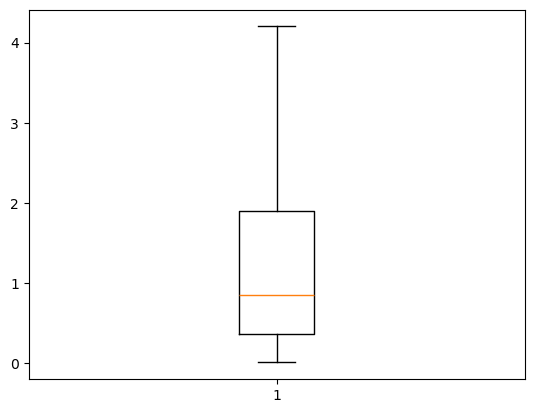

In [36]:
plt.boxplot(df1["creddebt"])
plt.show()

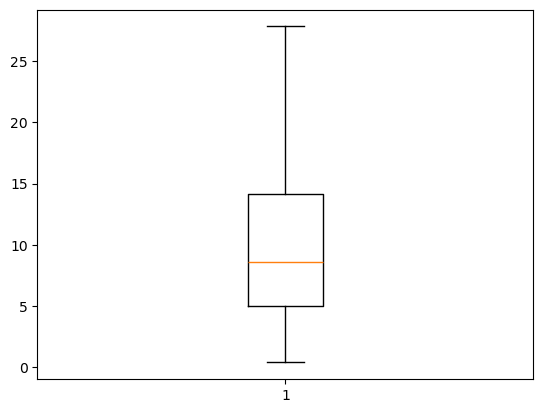

In [37]:
plt.boxplot(df1["debtinc"])
plt.show()

In [38]:
df1.corr()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
age,1.000000,0.015148,0.535858,0.595262,0.560951,0.018072,0.325964,0.316273,-0.137657
ed,0.015148,1.000000,-0.153540,0.057743,0.207103,0.010293,0.100188,0.104429,0.121484
employ,0.535858,-0.153540,1.000000,0.325574,0.724259,-0.038176,0.400145,0.424020,-0.289297
address,0.595262,0.057743,0.325574,1.000000,0.353031,0.015337,0.230237,0.237981,-0.165877
income,0.560951,0.207103,0.724259,0.353031,1.000000,-0.010541,0.545864,0.585654,-0.129385
debtinc,0.018072,0.010293,-0.038176,0.015337,-0.010541,1.000000,0.586534,0.551604,0.388436
creddebt,0.325964,0.100188,0.400145,0.230237,0.545864,0.586534,1.000000,0.803846,0.210469
othdebt,0.316273,0.104429,0.424020,0.237981,0.585654,0.551604,0.803846,1.000000,0.147564
default,-0.137657,0.121484,-0.289297,-0.165877,-0.129385,0.388436,0.210469,0.147564,1.000000


<Axes: >

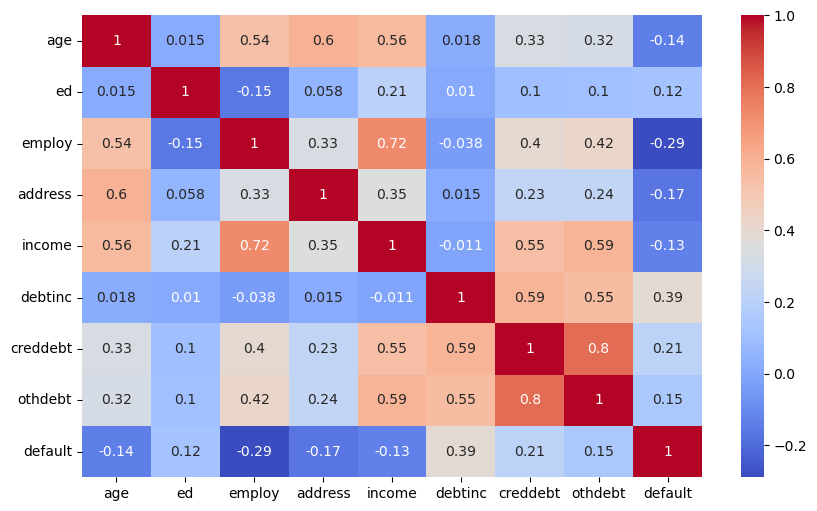

In [39]:
plt.figure(figsize=(10,6))
sns.heatmap(df1.corr(), annot=True, cmap ="coolwarm")

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [41]:
df1.columns

Index(['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt', 'default'],
      dtype='object')

In [42]:
x =df1[['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt']]
y =df1["default"]

In [43]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=55)

In [44]:
lr = LogisticRegression()

In [45]:
lr.fit(x_train,y_train)

LogisticRegression()

In [46]:
# difference between train and test accuracy not more than 0.5%
print("Train accuracy ", lr.score(x_train,y_train))
print("Test accuracy ",lr.score(x_test,y_test))

Train accuracy  0.7982142857142858
Test accuracy  0.8285714285714286


In [47]:
from sklearn.metrics import classification_report

In [48]:
sample.drop(columns = "default", inplace = True)

In [49]:
sample

,age,ed,employ,address,income,debtinc,creddebt,othdebt
700,36.0,1.0,16.0,13.0,32.0,10.9,0.544128,2.943872
701,50.0,1.0,6.0,27.0,21.0,12.9,1.316574,1.392426
702,40.0,1.0,9.0,9.0,33.0,17.0,4.880700,0.729300
703,31.0,1.0,5.0,7.0,23.0,2.0,0.046000,0.414000
704,29.0,1.0,4.0,0.0,24.0,7.8,0.866736,1.005264
...,...,...,...,...,...,...,...,...
845,34.0,1.0,12.0,15.0,32.0,2.7,0.239328,0.624672
846,32.0,2.0,12.0,11.0,116.0,5.7,4.026708,2.585292
847,48.0,1.0,13.0,11.0,38.0,10.8,0.722304,3.381696
848,35.0,2.0,1.0,11.0,24.0,7.8,0.417456,1.454544


In [50]:
sample["pre_y"] = lr.predict(sample)

In [51]:
sample

,age,ed,employ,address,income,debtinc,creddebt,othdebt,pre_y
700,36.0,1.0,16.0,13.0,32.0,10.9,0.544128,2.943872,0.0
701,50.0,1.0,6.0,27.0,21.0,12.9,1.316574,1.392426,0.0
702,40.0,1.0,9.0,9.0,33.0,17.0,4.880700,0.729300,1.0
703,31.0,1.0,5.0,7.0,23.0,2.0,0.046000,0.414000,0.0
704,29.0,1.0,4.0,0.0,24.0,7.8,0.866736,1.005264,0.0
...,...,...,...,...,...,...,...,...,...
845,34.0,1.0,12.0,15.0,32.0,2.7,0.239328,0.624672,0.0
846,32.0,2.0,12.0,11.0,116.0,5.7,4.026708,2.585292,0.0
847,48.0,1.0,13.0,11.0,38.0,10.8,0.722304,3.381696,0.0
848,35.0,2.0,1.0,11.0,24.0,7.8,0.417456,1.454544,0.0


In [52]:
d=pd.DataFrame({'age':[49],
             'ed':[2],
             'employ':[1],
             'address':[2],
             'income':[2],
             'debtinc':[9],
             'creddebt':[1.5],
             'othdebt':[0.1]})

In [53]:
lr.predict(d)

array([1.])

In [54]:
print(classification_report(y_train, lr.predict(x_train)))

              precision    recall  f1-score   support

         0.0       0.83      0.92      0.87       412
         1.0       0.67      0.46      0.55       148

    accuracy                           0.80       560
   macro avg       0.75      0.69      0.71       560
weighted avg       0.79      0.80      0.78       560



In [55]:
print(classification_report(y_test, lr.predict(x_test)))

              precision    recall  f1-score   support

         0.0       0.85      0.93      0.89       105
         1.0       0.72      0.51      0.60        35

    accuracy                           0.83       140
   macro avg       0.79      0.72      0.75       140
weighted avg       0.82      0.83      0.82       140



In [56]:
pro_train=pd.DataFrame(lr.predict_proba(x_train),columns = ["prob_0","prob_1"])

In [57]:
pro_train

,prob_0,prob_1
0,0.979600,0.020400
1,0.138182,0.861818
2,0.993800,0.006200
3,0.872754,0.127246
4,0.888836,0.111164
...,...,...
555,0.581663,0.418337
556,0.957667,0.042333
557,0.952783,0.047217
558,0.957591,0.042409


In [58]:
copy = x_train.copy()

In [59]:
copy

,age,ed,employ,address,income,debtinc,creddebt,othdebt
518,41.0,1.0,7.0,22.0,32.0,2.9,0.072384,0.072384
382,39.0,2.0,2.0,12.0,46.0,16.0,4.003840,4.003840
103,42.0,2.0,21.0,11.0,101.5,3.1,1.365364,1.365364
438,32.0,2.0,8.0,2.0,45.0,3.7,0.982350,0.982350
293,24.0,1.0,4.0,2.0,21.0,2.6,0.099372,0.099372
...,...,...,...,...,...,...,...,...
37,32.0,2.0,12.0,1.0,54.0,14.4,3.195936,3.195936
541,26.0,1.0,10.0,2.0,32.0,4.7,0.126336,0.126336
295,45.0,1.0,10.0,14.0,52.0,5.4,0.932256,0.932256
666,44.0,2.0,21.0,14.0,101.5,13.2,3.192024,8.240000


In [60]:
copy["pre_y"] = lr.predict(copy)

In [61]:
copy

,age,ed,employ,address,income,debtinc,creddebt,othdebt,pre_y
518,41.0,1.0,7.0,22.0,32.0,2.9,0.072384,0.072384,0.0
382,39.0,2.0,2.0,12.0,46.0,16.0,4.003840,4.003840,1.0
103,42.0,2.0,21.0,11.0,101.5,3.1,1.365364,1.365364,0.0
438,32.0,2.0,8.0,2.0,45.0,3.7,0.982350,0.982350,0.0
293,24.0,1.0,4.0,2.0,21.0,2.6,0.099372,0.099372,0.0
...,...,...,...,...,...,...,...,...,...
37,32.0,2.0,12.0,1.0,54.0,14.4,3.195936,3.195936,0.0
541,26.0,1.0,10.0,2.0,32.0,4.7,0.126336,0.126336,0.0
295,45.0,1.0,10.0,14.0,52.0,5.4,0.932256,0.932256,0.0
666,44.0,2.0,21.0,14.0,101.5,13.2,3.192024,8.240000,0.0


In [62]:
copy["manually_predict"] = np.where(pro_train["prob_1"]>0.5,1,0)

In [63]:
copy

,age,ed,employ,address,income,debtinc,creddebt,othdebt,pre_y,manually_predict
518,41.0,1.0,7.0,22.0,32.0,2.9,0.072384,0.072384,0.0,0
382,39.0,2.0,2.0,12.0,46.0,16.0,4.003840,4.003840,1.0,1
103,42.0,2.0,21.0,11.0,101.5,3.1,1.365364,1.365364,0.0,0
438,32.0,2.0,8.0,2.0,45.0,3.7,0.982350,0.982350,0.0,0
293,24.0,1.0,4.0,2.0,21.0,2.6,0.099372,0.099372,0.0,0
...,...,...,...,...,...,...,...,...,...,...
37,32.0,2.0,12.0,1.0,54.0,14.4,3.195936,3.195936,0.0,0
541,26.0,1.0,10.0,2.0,32.0,4.7,0.126336,0.126336,0.0,0
295,45.0,1.0,10.0,14.0,52.0,5.4,0.932256,0.932256,0.0,0
666,44.0,2.0,21.0,14.0,101.5,13.2,3.192024,8.240000,0.0,0


In [64]:
#imporoving recall by changing in probability
actual = y_train
pre = np.where(pro_train["prob_1"]>=0.3,1,0)

In [65]:
print("NEW VALUE")
print(classification_report(actual, pre))

NEW VALUE
              precision    recall  f1-score   support

         0.0       0.88      0.76      0.82       412
         1.0       0.52      0.72      0.61       148

    accuracy                           0.75       560
   macro avg       0.70      0.74      0.71       560
weighted avg       0.79      0.75      0.76       560



In [66]:
print("OLD VALUE")
print(classification_report(actual, pre))

OLD VALUE
              precision    recall  f1-score   support

         0.0       0.88      0.76      0.82       412
         1.0       0.52      0.72      0.61       148

    accuracy                           0.75       560
   macro avg       0.70      0.74      0.71       560
weighted avg       0.79      0.75      0.76       560



In [67]:
sample

,age,ed,employ,address,income,debtinc,creddebt,othdebt,pre_y
700,36.0,1.0,16.0,13.0,32.0,10.9,0.544128,2.943872,0.0
701,50.0,1.0,6.0,27.0,21.0,12.9,1.316574,1.392426,0.0
702,40.0,1.0,9.0,9.0,33.0,17.0,4.880700,0.729300,1.0
703,31.0,1.0,5.0,7.0,23.0,2.0,0.046000,0.414000,0.0
704,29.0,1.0,4.0,0.0,24.0,7.8,0.866736,1.005264,0.0
...,...,...,...,...,...,...,...,...,...
845,34.0,1.0,12.0,15.0,32.0,2.7,0.239328,0.624672,0.0
846,32.0,2.0,12.0,11.0,116.0,5.7,4.026708,2.585292,0.0
847,48.0,1.0,13.0,11.0,38.0,10.8,0.722304,3.381696,0.0
848,35.0,2.0,1.0,11.0,24.0,7.8,0.417456,1.454544,0.0


In [68]:
sample.drop(columns = "pre_y", inplace = True)

In [69]:
sam_pro =pd.DataFrame(lr.predict_proba(sample),columns = ["prob_0","prob_1"])

In [70]:
sample["default"] = np.where(sam_pro["prob_1"]>0.3,1,0)

In [71]:
sample

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
700,36.0,1.0,16.0,13.0,32.0,10.9,0.544128,2.943872,0
701,50.0,1.0,6.0,27.0,21.0,12.9,1.316574,1.392426,0
702,40.0,1.0,9.0,9.0,33.0,17.0,4.880700,0.729300,1
703,31.0,1.0,5.0,7.0,23.0,2.0,0.046000,0.414000,0
704,29.0,1.0,4.0,0.0,24.0,7.8,0.866736,1.005264,1
...,...,...,...,...,...,...,...,...,...
845,34.0,1.0,12.0,15.0,32.0,2.7,0.239328,0.624672,0
846,32.0,2.0,12.0,11.0,116.0,5.7,4.026708,2.585292,0
847,48.0,1.0,13.0,11.0,38.0,10.8,0.722304,3.381696,0
848,35.0,2.0,1.0,11.0,24.0,7.8,0.417456,1.454544,0


In [72]:
dd = pd.read_excel("test.xlsx")

In [73]:
dd

,age,ed,employ,address,income,debtinc,creddebt,othdebt
0,29,2,10,5,15,20,2,4


In [74]:
pd.DataFrame(dd)

,age,ed,employ,address,income,debtinc,creddebt,othdebt
0,29,2,10,5,15,20,2,4
